In [679]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sm-datamining-hw1/sample_submission.csv
/kaggle/input/sm-datamining-hw1/train.csv
/kaggle/input/sm-datamining-hw1/test.csv


In [680]:
train = pd.read_csv('/kaggle/input/sm-datamining-hw1/train.csv')
test = pd.read_csv('/kaggle/input/sm-datamining-hw1/test.csv')
train = train.replace({'Canceled':1, 'Not_Canceled':0})

#train.head() # 5개 불러오기
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['market_segment_type'] = label_encoder.fit_transform(train['market_segment_type'])
test['market_segment_type'] = label_encoder.fit_transform(test['market_segment_type'])
train['type_of_meal_plan'] = label_encoder.fit_transform(train['type_of_meal_plan'])
test['type_of_meal_plan'] = label_encoder.fit_transform(test['type_of_meal_plan'])
# 데이터 분포 확인

# room_type_reserved 의 string type을 int로 변형한 새로운 column 'room_type' 생성
train['room_type'] = train['room_type_reserved'].str.replace('Room_Type ','').astype(int)
test['room_type'] = test['room_type_reserved'].str.replace('Room_Type ','').astype(int)

# previous_cancellations 와 previous_bookings_not_canceled 값을 더한 새로운 column 'no_of_previous' 생성
train['no_of_previous'] = train['no_of_previous_cancellations'] + train['no_of_previous_bookings_not_canceled']
test['no_of_previous'] = test['no_of_previous_cancellations'] + test['no_of_previous_bookings_not_canceled']

def category_price(x):
    if x<50:
        return 0
    elif x<100:
        return 1
    elif x<150:
        return 2
    elif x<200:
        return 3
    elif x<250:
        return 4
    elif x<300:
        return 5
    else:
        return 6
train['room_price']=train['avg_price_per_room'].apply(category_price)

# 사용하지 않는 attribute drop
#train.drop([ 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], axis=1, inplace=True)
#test.drop(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], axis=1, inplace=True)

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25392 non-null  object 
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  int64  
 6   required_car_parking_space            25392 non-null  int64  
 7   room_type_reserved                    25392 non-null  object 
 8   lead_time                             25392 non-null  int64  
 9   arrival_year                          25392 non-null  int64  
 10  arrival_month                         25392 non-null  int64  
 11  arrival_date   

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,room_type,no_of_previous,room_price
0,INN29581,2,0,1,3,0,0,Room_Type 1,200,2018,...,4,0,0,0,90.95,0,1,1,0,1
1,INN06326,2,0,1,3,0,0,Room_Type 1,79,2018,...,4,0,0,0,90.95,1,1,1,0,1
2,INN33900,2,0,1,4,0,0,Room_Type 4,78,2018,...,4,0,0,0,99.45,1,0,4,0,1
3,INN00721,2,0,2,0,0,0,Room_Type 1,61,2017,...,3,0,0,0,91.00,0,0,1,0,1
4,INN22121,2,1,0,4,0,0,Room_Type 1,201,2018,...,4,0,0,0,82.28,3,0,1,0,1


In [681]:
# attribute들 간의 관계 확인
#train[['no_of_adults', 'booking_status']].groupby(['no_of_adults'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
#train[['no_of_children', 'booking_status']].groupby(['no_of_children'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
#train[['no_of_weekend_nights', 'booking_status']].groupby(['no_of_weekend_nights'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
#train[['no_of_week_nights', 'booking_status']].groupby(['no_of_week_nights'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
#train[['arrival_year', 'booking_status']].groupby(['arrival_year'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
#train[['market_segment_type', 'booking_status']].groupby(['market_segment_type'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
#train[['no_of_special_requests', 'booking_status']].groupby(['no_of_special_requests'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
#train[['no_of_previous', 'booking_status']].groupby(['no_of_previous'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
#train[['room_type', 'booking_status']].groupby(['room_type'], as_index=False).mean().sort_values(by='booking_status', ascending=False)
train[['room_price', 'booking_status']].groupby(['room_price'], as_index=False).mean().sort_values(by='room_price', ascending=False)

,room_price,booking_status
6,6,0.454545
5,5,0.600000
4,4,0.483974
3,3,0.338869
2,2,0.414319
1,1,0.257886
0,0,0.048973


<AxesSubplot:xlabel='room_price'>

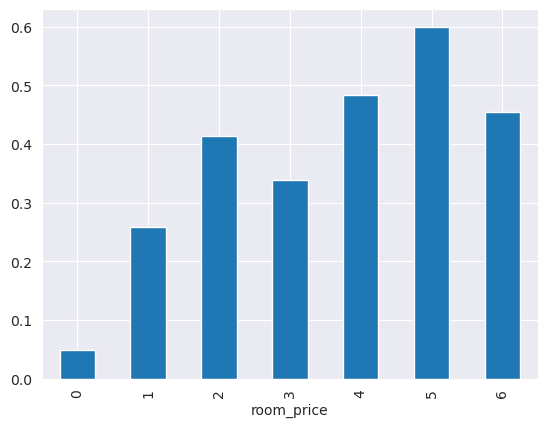

In [682]:
# attribute들 간의 관계 확
#train.groupby('no_of_adults')['booking_status'].mean().plot.bar()
#train.groupby('no_of_children')['booking_status'].mean().plot.bar()
#train.groupby('no_of_weekend_nights')['booking_status'].mean().plot.bar()
#train.groupby('no_of_week_nights')['booking_status'].mean().plot.bar()
#train.groupby('arrival_year')['booking_status'].mean().plot.bar()
#train.groupby('market_segment_type')['booking_status'].mean().plot.bar()
#train.groupby('no_of_special_requests')['booking_status'].mean().plot.bar()
#train.groupby('no_of_previous')['booking_status'].mean().plot.bar()
#train.groupby('room_type')['booking_status'].mean().plot.bar()
train.groupby('room_price')['booking_status'].mean().plot.bar()

In [683]:
# 이상치 확인
# sns.set_style("darkgrid")
# sns.boxplot(y=train["lead_time"])
# sns.boxplot(y=train["no_of_special_requests"])
# plt.show()

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
#outlier_idx = get_outlier(df=train, column='lead_time', weight=1.5)
#train.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=train, column='market_segment_type', weight=1.5)
train.drop(outlier_idx, axis=0, inplace=True)

In [684]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#no_of_adults,no_of_children,avg_price_per_room 특징만 고려
#feature_names = ["no_of_adults", "no_of_children","no_of_weekend_nights", "no_of_week_nights","required_car_parking_space","room_type", "lead_time","arrival_year","arrival_month","arrival_date","market_segment_type","repeated_guest","no_of_previous_cancellations","no_of_previous_bookings_not_canceled", "avg_price_per_room", "room_price", "no_of_special_requests", 'no_of_previous']
feature_names = ["no_of_adults","no_of_weekend_nights", "no_of_week_nights","required_car_parking_space","room_type", "lead_time","arrival_year","arrival_month","arrival_date","market_segment_type", "avg_price_per_room","no_of_special_requests"]
X = train[feature_names]
y = train["booking_status"]

# Decision Tree 학습/예측/평가 
# train_test_split cross validation
iris = load_iris()
iris_data = iris.data
X_train, X_test, y_train, y_test = train_test_split(X,y)
dt_model = DecisionTreeClassifier(max_depth= 12, min_samples_split= 24)

#dt_model=GridSearchCV(dt_model, param_grid=parameters, cv=3, refit=True)
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# GaussianNB 학습/예측/평가
#nb_model = GaussianNB()
#nb_model.fit(X_train , y_train)
#nb_pred = nb_model.predict(X_test)
#print('GaussianNB 정확도: {0:.4f}'.format(accuracy_score(y_test, nb_pred)))

# LogisticRegression 학습/예측/평가
#lr_model = LogisticRegression()
#lr_model.fit(X_train , y_train)
#lr_pred = lr_model.predict(X_test)
#print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

# multi-layer perceptron 학습/예측/평가
#mlp_model = MLPClassifier()
#mlp_model.fit(X_train , y_train)
#mlp_pred = mlp_model.predict(X_test)
#print('MLPClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, mlp_pred)))

# NearestNeighbors 학습/예측/평가
#knn_model = KNeighborsClassifier()
#knn_model.fit(X_train , y_train)
#knn_pred = knn_model.predict(X_test)
#print('NearestNeighbors 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))


DecisionTreeClassifier 정확도: 0.8656


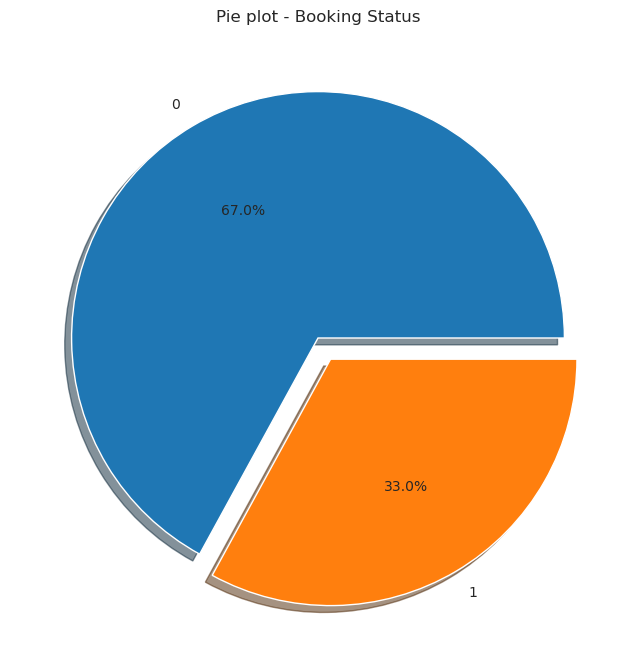

In [685]:
# 데이터분석
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18, 8))

train['booking_status'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
ax.set_title('Pie plot - Booking Status')
ax.set_ylabel('')

plt.show()

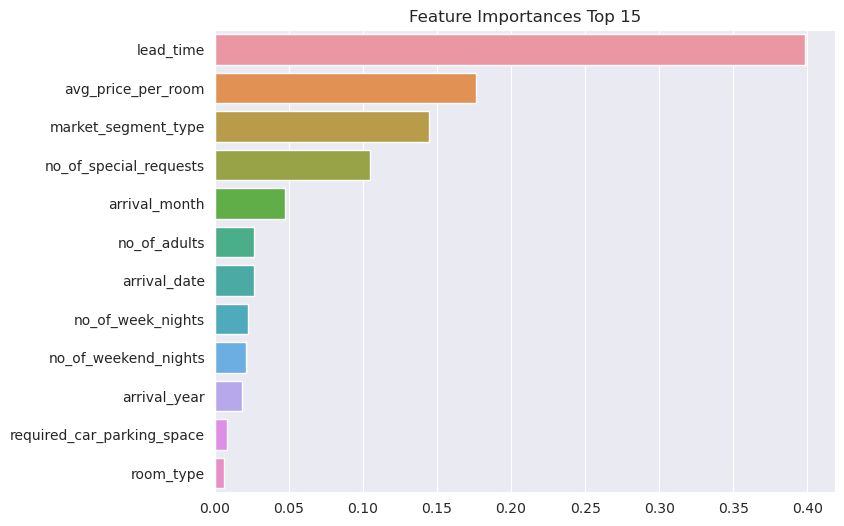

In [686]:
# Feature Importances
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = dt_model.feature_importances_
feature_importances = pd.Series(feature_importance, index=X_train.columns)
feature_top15 = feature_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=feature_top15, y=feature_top15.index)
plt.show()

In [687]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [8, 10, 12, 16, 20],
          'min_samples_split' : [16, 24, 28, 32]
}

grid_cv = GridSearchCV(dt_model, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params', 'mean_test_score',  'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV 최고 평균 정확도 수치: 0.8648
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 12, 'min_samples_split': 16}


,rank_test_score,params,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,17,"{'max_depth': 8, 'min_samples_split': 16}",0.854229,0.845847,0.855126,0.863648,0.854594,0.851931
1,19,"{'max_depth': 8, 'min_samples_split': 24}",0.854123,0.845847,0.854328,0.863648,0.854594,0.852197
2,20,"{'max_depth': 8, 'min_samples_split': 28}",0.854016,0.845847,0.854061,0.863648,0.854328,0.852197
3,18,"{'max_depth': 8, 'min_samples_split': 32}",0.854123,0.845580,0.855126,0.863648,0.854061,0.852197
4,5,"{'max_depth': 10, 'min_samples_split': 16}",0.861845,0.854633,0.862583,0.875366,0.862583,0.854061
5,8,"{'max_depth': 10, 'min_samples_split': 24}",0.861259,0.854633,0.859654,0.874035,0.862583,0.855393
6,6,"{'max_depth': 10, 'min_samples_split': 28}",0.861632,0.854899,0.861518,0.873768,0.860985,0.856991
7,7,"{'max_depth': 10, 'min_samples_split': 32}",0.861366,0.854633,0.860719,0.873236,0.861252,0.856991
8,1,"{'max_depth': 12, 'min_samples_split': 16}",0.864775,0.858094,0.870040,0.870040,0.863382,0.862317
9,2,"{'max_depth': 12, 'min_samples_split': 24}",0.864615,0.858360,0.867111,0.870040,0.864181,0.863382


In [688]:
x_test=test[feature_names]

In [689]:
prediction_list= dt_model.predict(x_test)
# prediction_list= nb_model.predict(x_test)
# prediction_list= lr_model.predict(x_test)
# prediction_list= mlp_model.predict(x_test)
# prediction_list= knn_model.predict(x_test)
submit = pd.read_csv("/kaggle/input/sm-datamining-hw1/sample_submission.csv")
submit["booking_status"] = prediction_list
submit = submit.replace({'Canceled':1, 'Not_Canceled':0})
submit

,Booking_ID,booking_status
0,INN04969,0
1,INN34541,0
2,INN36109,0
3,INN01554,1
4,INN24975,0
...,...,...
10878,INN29686,0
10879,INN01107,1
10880,INN06811,0
10881,INN27777,1


In [690]:
submit.to_csv("dt_submit.csv",index=False)

In [691]:
from sklearn.metrics import accuracy_score

y_true = [0, 1, 1, 0, 1, 0]  # 실제값
y_pred = [0, 1, 0, 0, 1, 1]  # 예측값

accuracy = accuracy_score(y_true, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.6666666666666666
